# Support Vector Machines /  Maquina de Vectores de Soporte

Son un set de métodos de aprendizaje supervisado usados para la clasificación, regresión y detección de outliers.


-Este es efectivo en espacios de grandes dimensiones.

-Sigue siendo efectivo en casos donde el número de dimensiones es mayor al número de muestras.

-Usa un subset de puntos de entrenamiento en la función de decisión, llamados Vector de Soportes.

-Versátil, ya que permite configuar las funciones Kernel.

-Es fundamental regularizar los datos que se van a utilizar. 

-En caso que el número de variables sea mayor al de muestras, se debe evadir el Overfitting o Sobreajuste modificando el Kernel. 

# SVR Support Vector Regression / Regresión de Soporte Vectorial

-Este modelo cuenta con las bases de un Support Vector Machine (SVM) pero con cambios ligeros. Enfocado en resolver problemas de regresión. 

-SVR coloca las muestras en diferentes puntos, trazando una línea entre ellos llamada Hyperplane o Hiperplano, que ayudará 
a predecir los valores con mayor exactitud.

-Lo que hace este modelo especial es que traza dos bandas, llamadas Decision Boundaries o Límites de Decisión  alrededor del 
hiperplano los cuales asistirá a medir el margen de tolerancia del modelo.

-A ese margen de tolerancia se le conoce como Epsilon. 

-Al ser un modelo de regresión, la exactitud es más difícil de ser alcanzada sin embargo el modelo va a brindar un buen 
desempeño al predecir.

-Para un caso de regresión no lineal, el Kernel va a transformar los datos a una dimensión más grande y realizar una separación 
lineal, lo que quiere decir que se puede usar datos lineales y no lineales.

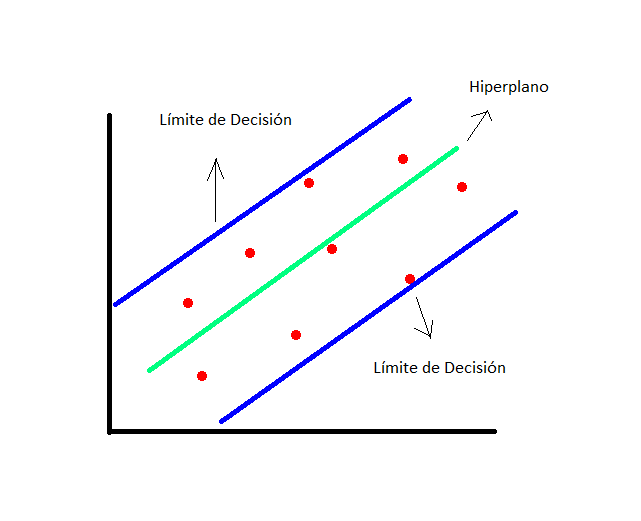

Vectores de entrenamiento dados  xi∈Rp, i=1,…, n, y un vector y∈Rn ε -SVR resuelve el siguiente problema primario:

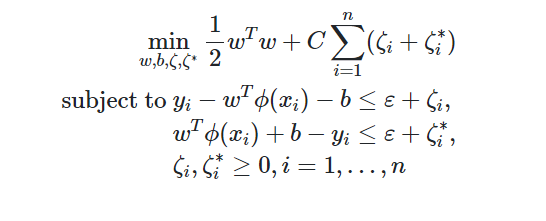

Aquí, vamos a penalizar muestras cuya predicción sea menor ε lejos de su verdadero objetivo. Estas muestras penalizan el objetivo por ζi o ζi∗, dependiendo de si su predicción cae bajo o sobre el ε tubo.
El problema dual es:

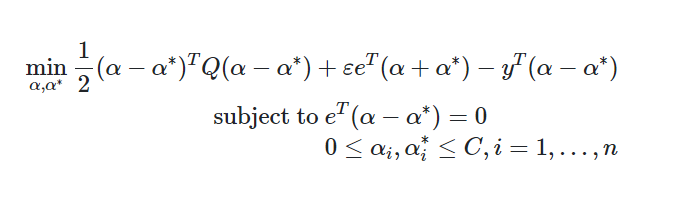

La fórmula de la predicción es la siguiente:

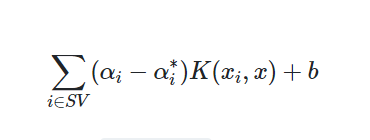

### Importación de paquetes.

Luego de haber instalado los paquetes utilizando el comando python -m pip install NombrePaquete en el CMD importaremos los paquetes que serán necesario para el siguiente ejercicio.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

### Carga de datos.

Por medio de read_csv() cargaremos el set de datos con el cual entrenaremos el modelo predictivo.

header=0 indica la columna que funcionará como cabecera.

También es posible utilizar sep=";" para indicar el delimitador acorde a los datos.

In [136]:
df = pd.read_csv('Dummy Data HSS.csv', header = 0)

### Exploración de datos.

Brevemente utilizaremos métodos básicos para visualizar el data set de manera efectiva para reconocer las dimensiones y los diferentes formatos que lo conforman. 

Es indispensable para la toma de decisiones al momento de generar el modelo.

Un mal uso de los datos puede resumirse en bajos resultados al momento de predecir.

In [137]:
#Muestra los datos superiores.
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [138]:
#Muestra los datos inferiores.
df.tail()

,TV,Radio,Social Media,Influencer,Sales
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411
4571,42.0,15.966688,5.046548,Micro,148.202414


In [139]:
#Ver la información de los datos, principalmente el formato.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
TV              4562 non-null float64
Radio           4568 non-null float64
Social Media    4566 non-null float64
Influencer      4572 non-null object
Sales           4566 non-null float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [140]:
#Dimensiones de los datos.
df.shape

(4572, 5)

In [141]:
#Estadísticas de los datos.
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


### Manejo de valores nulos o NA's values

Los valores nulos son valores que no existen y por lo tanto no aportan valor al modelo.

En algunos casos es fundamental convertir los valores nulos en valores reales que ayuden a predecir para no perder el número de muestras, lo mejor es convertirlos en la media para que no vayan a alterar los resultados.

En otros casos, simplemente se pueden eliminar esa fila de datos. Opción viable en data sets de grandes dimensiones con una mínima cantidad de nulos.

In [142]:
#Imprime Falso o Verdadero a las columnas con valores nulos.
df.isna().any()

TV               True
Radio            True
Social Media     True
Influencer      False
Sales            True
dtype: bool

In [143]:
#Presenta la suma de valores nuloes en cada columna.
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [144]:
#Elimina los valores nulos.
df = df.dropna()

In [145]:
#Dimensiones de los datos.
df.shape

(4546, 5)

### Codificación de una variable categórica a valores Dummy

Consiste en darle valor a las variables que contienen valores categóricos, por medio de 0 y 1, mostranto ausencia y presencia del valor.

Esta práctica es bastante común en modelos de regresión.

In [146]:
#Convierte los datos categoricos en variables dummy o variable indicadora.
df = pd.get_dummies(df)

In [147]:
#Muestra las diferentes columnas del set de datos.
df.columns

Index([u'TV', u'Radio', u'Social Media', u'Sales', u'Influencer_Macro',
       u'Influencer_Mega', u'Influencer_Micro', u'Influencer_Nano'],
      dtype='object')

In [148]:
#Renombrar las columnas.
df = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]

In [149]:
#Muestra los datos superiores.
df.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181


### Selección de variables

Segmentaremos el set de datos principal en X como las variables independientes y Y como la variable dependiente, utilizando la función iloc[] 

La variable dependiente es la variable a predecir 

Las variables independientes son las variables con las cuales se entrenará el modelo para realizar la predicción. 

In [150]:
#Selecciona todas las filas y las columnas de la 0 a la penúltima.
X_train = df.iloc[:, 0:-1]

In [151]:
#Selecciona todas las filas y solamente la última columna.
y_train = df.iloc[:, -1]

### Preprocesamiento de datos utilizando StandarScaler() 

La mayoría de los modelos predictivos requieren que los datos se encuentre preprocesados para brindar mejores desempeños.

El procesamientos de los datos consiste en centrar y escalar los datos.

Para centrar los datos se le deben de restar el promedio a la variable.

Escalar los datos se basa en dividir la variable por la desviación estándar.

### Ecuación matemática

z = (x - u) / s

Donde u es es promedio de las muestras entrenadas o 0 si with_mean=False.

Y s es la desviación estándar de las muestras entrenadas o 1 si with_std=False. 


In [152]:
#Por medio del módulo Preprocessing se utilizará la función StandardScaler() para escalar los datos de entrenamiento.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train

C:\Users\esteb\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.45823346, -1.19965497, -0.18791862, ...,  1.71644416,
        -0.58124504, -0.57650359],
       [-1.57316687, -0.92316155, -0.41334293, ...,  1.71644416,
        -0.58124504, -0.57650359],
       [-0.50045503, -0.23504873, -0.1854639 , ...,  1.71644416,
        -0.58124504, -0.57650359],
       ...,
       [-0.38552162,  0.16999646,  0.80176862, ..., -0.58259979,
         1.7204448 , -0.57650359],
       [ 0.64887908, -0.064467  , -0.62532471, ..., -0.58259979,
        -0.58124504, -0.57650359],
       [-0.46214389, -0.22674405,  0.77931543, ..., -0.58259979,
         1.7204448 , -0.57650359]])

In [153]:
#Le da una nueva forma al arreglo sin perder los valores originales.
y_train = y_train.values.reshape(-1, 1)

In [154]:
#Escalar los datos de prueba.
scaler = preprocessing.StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_train

array([[-1.48028282],
       [-1.56688524],
       [-0.45409812],
       ...,
       [-0.30945044],
       [ 0.65796489],
       [-0.47533694]])

### Diferentes método para preprocesar datos

#### MinMaxScaler() or MaxAbsScaler()

Estos métodos escalan los datos de una variable entre un valor máximo y un valor mínimo predeterminado.

MaxAbsScaler() es utilizado principalmente en set de datos muy esparcidos. Este generalmente escala los datos entre -1 y 1.

MinMaxScaler() en este método se deben definir los límites, los cuales suelen son 0 - 1.

#### RobustScaler()

Esta técnica sera mencionada y aplicada más adelante.

### Partición de datos

A continuación realizaremos la partición de datos por medio de la función train_test_split() la cual se encargará de dividir el set de datos con variables independientes y el set de datos con las variable dependiendientes. 

Las muestras se dividen en un 70% de datos para entrenar y un 30% para la prueba. 

In [155]:
#Se crea una set de entrenamiento y prueba del set de datos X y Y. 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### Regresión de Soporte Vectorial

Generaremos el modelo de manera predeterminada y los aplicaremos sobre los sets de datos que vamos a entrenar con svm.SVR().

In [156]:
#Modelo Regresion de Soporte Vectorial 
regr = svm.SVR()

In [157]:
#Aplicar el modelo en el set de datos
regr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Evaluación del modelo

Para conocer el desempeño del modelo utilizaremos cross_val_score() y regr.score() 

In [158]:
#Método de evaluación.
print(cross_val_score(regr, X_train, y_train))
regr.score(X_train,y_train)

[0.99701004 0.99702973 0.99649019]


0.9975735512004431

### Predicción

Finalmente, a través de predict() y del modelo generado anteriomente sobre el set de datos de prueba, crearemos un arreglo con las predicciones.

In [159]:
#Predecir
y_pred = regr.predict(X_test)

In [160]:
#Revisar los datos
y_pred

array([ 1.48520786, -0.16117554,  0.52915973, ...,  0.36261548,
       -0.21654446, -0.61161198])

### Desescalar la predición.

Escala de vuelta los datos a la presetación original con inverse_transform(x)

In [161]:
#Desescalar la predición.
y_pred = scaler.inverse_transform(y_pred)

In [162]:
#Revisar los datos.
y_pred

array([330.55198282, 177.42245247, 241.63028949, ..., 226.14006774,
       172.27260987, 135.52752061])

In [163]:
#Desescalar el set de datos de pruebas.
y_test = scaler.inverse_transform(y_test)

In [164]:
#Revisar los datos
y_test

array([[332.9933237],
       [184.5395186],
       [244.6335186],
       ...,
       [231.2683509],
       [171.3033756],
       [140.3898571]])

### Desempeño de la predicción

Mediremos los resultados de la predicción sobre el set de datos de prueba utilizando las diferentes métricas evaluación.

#### r2_score() o Puntuación R2

La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor). Un modelo constante que siempre predice el valor esperado de y, sin tener en cuenta las características de entrada, obtendría una puntuación R ^ 2 de 0.0.

#### mean_squared_error() o Error Promedio al Cuadrado

La función mean_squared_error calcula el error cuadrático medio, una métrica de riesgo correspondiente al valor esperado del error o pérdida cuadrática (cuadrática).

#### explained_variance_score() o Puntuación de varianza explicada

Función de puntuación de regresión de varianza explicada.

La mejor puntuación posible es 1.0, los valores más bajos son peores.

#### mean_absolute_error() o Error promedio absoluto

La función mean_absolute_error calcula el error absoluto medio, una métrica de riesgo que corresponde al valor esperado de la pérdida absoluta por error o la pérdida normal.

In [165]:
#Puntuación R2.
r2_score(y_test, y_pred)

0.9976446145512904

In [166]:
#Error promedio al cuadrado.
mean_squared_error(y_test, y_pred)

20.678383216140606

In [167]:
#Puntuación de varianza explicada.
explained_variance_score(y_test, y_pred)

0.9976784872380962

In [168]:
#Error promedio absoluto.
mean_absolute_error(y_test, y_pred)

3.617320893689496

In [169]:
#Comparación de las diferentes métricas de evaluación.
print("Puntuación R2:                    {}".format(r2_score(y_test, y_pred)))
print("Error promedio al cuadrado:       {}".format(mean_squared_error(y_test, y_pred)))
print("Puntuación de varianza explicada: {}".format(explained_variance_score(y_test, y_pred)))
print("Error promedio absoluto:          {}".format(mean_absolute_error(y_test, y_pred)))

R2 puntuación:                    0.997644614551
Error promedio al cuadrado:       20.6783832161
Puntuación de varianza explicada: 0.997678487238
Error promedio absoluto:          3.61732089369


### Hyperparámetros

Conjunto de parámetros que se encargan de configurar el proceso de aprendizaje de un modelo.

La discrepancia de estos puede variar los resultados obtenidos.

Ya que existe una gran cantidad de variables de hyperparámetros, existen funciones que se encargan de brindar la mejor combinación para el modelo, ejemplo de esto son GridSearchCV() y RandomizedSearchCV().

### RandomizedSearchCV()

Busqueda al azar sobre los hiperparámetros.

Los parámetros ingresados son optimizados por una busqueda cros-validada sopre la configuración de parámetros.

Este modelo solamente prueba una cantidad de modelos al azar, la cual debe ser especifica al ser creado. El número de pruebas
es definido por n_iter.

Si los parámetros son presentados como una lista, muestreo sin remplazo es realizado. Si al menos un parámetro es dado como
una distribución, muestreo con reemplazo es realizado. Se recomienda utilizar distribución continua para parámetros continuos.

#### Código

In [ ]:
#Codigo para utilizar RandomSearchCV(). Ejemplo ilustrativo, no es aplicado en el modelo.
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import RandomizedSearchCV  
from scipy.stats import uniform  

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,    
                                random_state=0)     
distributions = dict(C=uniform(loc=0, scale=4),    
                                 penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train, y_test)
search.best_params_

### GridSearchCV

Realiza una busqueda exahustiva sobre los diferentes parámetros especificados para dar con la combinación que muestre el mejor resultado. 

Optimizado por busqueda cuadricular con validación cruzada sobre una cuadrícula de parámetros.

In [1]:
#Selección de parámetros a usar.
tuned_parameters = [{'C': [1000, 3000, 10000], 
                     'kernel': ['linear', 'rbf']}
                   ]

In [53]:
#Ejemplo con una mayor cantidad de parámetros.
tuned_parameters = [{'C': [1000, 3000, 10000], 
                     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                     'degree' : [3,8],
                     'coef0' : [0.01,10,0.5],
                     'gamma' : ('auto','scale')}
                   ]

In [171]:
#Creamos el GridSearchCV() que se encargará de aplicar lo seleccionado.
svr_tuned_GS = GridSearchCV(SVR (C=1), param_grid = tuned_parameters, scoring = 'r2', n_jobs=-1)

In [172]:
#Reproduciremos el modelo sobre los datos de entrenamiento y prueba.
svr_tuned_GS.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [1000, 3000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [173]:
#Imprimimos los parámetros ideales para el modelo de predicción.
print ('\n' "Mejore combinación de hyperparámetros por Grid Search o Busqueda Cuadricular: " + str(svr_tuned_GS.best_params_) +'\n')


Best parameter from grid search: {'kernel': 'linear', 'C': 10000}



#### Implementación de Hyperparámetros seleccionados

Finalmente, posterior a haber utilizado GridSearchCV y haber obtenido los hyperparámetros deseados, los configuramos al crear el modelo Regresión de Soporte Vectorial y su predicción dando con los mejores resultados determinados por el mismo.

In [174]:
#Creamos el modelos de regresión con los parámetros seleccionados por el GridSearchCV.
regr = svm.SVR(kernel='linear', C=10000)

In [175]:
#Aplicar el modelo en el set de datos.
regr.fit(X_train,y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
#Metodo de evaluacion.
regr.fit(X_train,y_train)
print(cross_val_score(regr, X_train, y_train))
regr.score(X_train,y_train)

[0.99891069 0.99869139 0.99878985]


0.9988678599138133

In [177]:
#Predecir.
y_pred = regr.predict(X_test)

In [178]:
#Desescalar la predicción.
y_pred = scaler.inverse_transform(y_pred)

In [179]:
#Desescalar el set de datos de pruebas.
y_test = scaler.inverse_transform(y_test)

### Desempeño de la predicción

Mediremos los resultados de la predicción sobre el set de datos de prueba a través de las diferentes métricas de evaluación anteriormente explicadas.

In [180]:
#Puntuación R2.
r2_score(y_test, y_pred)

-4.217649605889098

In [181]:
#Error promedio al cuadrado.
mean_squared_error(y_test, y_pred)

396264753.7829131

In [182]:
#Puntuación de varianza explicada
explained_variance_score(y_test, y_pred)

0.021386311174213746

In [183]:
#Error promedio absoluto.
mean_absolute_error(y_test, y_pred)

17942.742129313505

In [184]:
#Comparación de las diferentes métricas de evaluación.
print("Puntuación R2:                    {}".format(r2_score(y_test, y_pred)))
print("Error promedio al cuadrado:       {}".format(mean_squared_error(y_test, y_pred)))
print("Puntuación de varianza explicada: {}".format(explained_variance_score(y_test, y_pred)))
print("Error promedio absoluto:          {}".format(mean_absolute_error(y_test, y_pred)))

R2 puntuación:                    -4.21764960589
Error promedio al cuadrado:       396264753.783
Puntuación de varianza explicada: 0.0213863111742
Error promedio absoluto:          17942.7421293


### Ridge Regression / Regresión de Cresta

La regresión de crestas aborda algunos de los problemas de mínimos cuadrados ordinarios al imponer una penalización sobre el 
tamaño de los coeficientes. Los coeficientes de cresta minimizan una suma de cuadrados residual penalizada.

El parámetro de complejidad controla la cantidad de contracción a>0, cuanto mayor es el valor de a, mayor es la cantidad de 
contracción y, por lo tanto, los coeficientes se vuelven más robustos a la colinealidad.

Al igual que con otros modelos lineales, Regresion de cresta tomará en su método de ajuste las matrices X, y y almacenará los 
coeficientes del modelo lineal en su miembro coef_:

Regresion de Cresta es una técnica para analizar datos de regresión múltiple que sufren de multicolinealidad. 

Cuando ocurre multicolinealidad, las estimaciones de mínimos cuadrados son insesgadas, pero sus varianzas son grandes, por lo 
que pueden estar lejos de el verdadero valor. Al agregar un grado de sesgo a las estimaciones de regresión, la regresión de 
crestas reduce los errores estándar. Se espera que el efecto neto sea dar estimaciones más confiables.

Multicolinealidad, o colinealidad, es la existencia de relaciones casi lineales entre las variables independientes

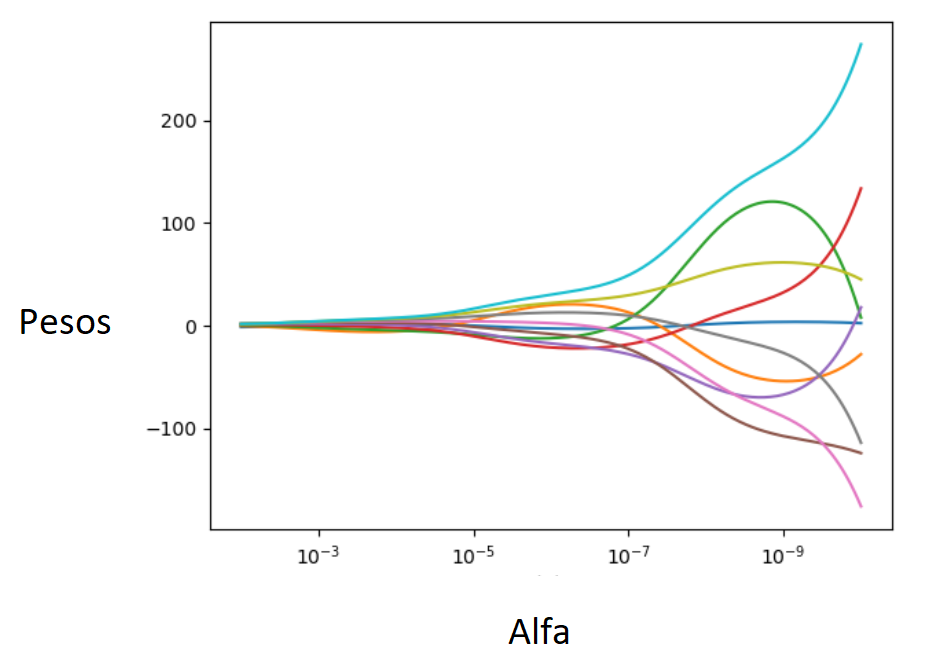

#### Ecuación matemática

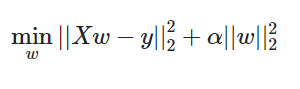

In [1]:
#Importación de parquetes a usar.
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Cargar datos
df = pd.read_csv('PrecioViviendas.csv', header = 0, sep = ";")

#### Exploración de datos.

Brevemente utilizaremos métodos básicos para visualizar el data set de manera efectiva para reconocer las dimensiones y los diferentes formatos que lo conforman.

In [3]:
#Muestra los datos superiores.
df.head()

,CodigoLinea,Suburbio,Direccion,Habitaciones,Tipo,Precio,Vendedor,Fecha,Distancia,CodigoPostal,NumeroDormitorios,Banos,NumeroVehiculos,TamanoTerreno,AreaConstruccion,PeriodoConstruccion,CodigoPais,Region,NumeroPropiedades
0,18289,Bacchus Marsh,4 Lidgett St,3,h,222300.0,Ryder,08/07/2017,37.5,3340,3,1,2,612,176.0,1992,1,Zona#07,2871.0
1,18226,Bullengarook,31 Carrolls La,3,h,417300.0,Keatings,12/08/2017,45.9,3437,3,1,0,4000,129.0,1993,1,Zona#06,249.0
2,18273,Melton West,9 Stacey Ct,3,h,319800.0,FN,23/09/2017,31.7,3337,3,2,2,545,151.0,2010,1,Zona#06,6065.0
3,18232,Melton West,7 Haywood Gr,4,h,468000.0,hockingstuart,12/08/2017,31.7,3337,4,2,2,935,210.0,2005,1,Zona#06,6065.0
4,18301,Brookfield,30 Pinrush Rd,4,h,355680.0,Reliance,29/07/2017,29.8,3338,4,2,2,576,189.0,2010,1,Zona#07,3122.0


In [4]:
#Información de las variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14903 entries, 0 to 14902
Data columns (total 19 columns):
CodigoLinea            14903 non-null int64
Suburbio               14903 non-null object
Direccion              14903 non-null object
Habitaciones           14903 non-null int64
Tipo                   14903 non-null object
Precio                 14903 non-null float64
Vendedor               14903 non-null object
Fecha                  14903 non-null object
Distancia              14903 non-null float64
CodigoPostal           14903 non-null int64
NumeroDormitorios      14903 non-null int64
Banos                  14903 non-null int64
NumeroVehiculos        14903 non-null int64
TamanoTerreno          14903 non-null int64
AreaConstruccion       14903 non-null float64
PeriodoConstruccion    14903 non-null int64
CodigoPais             14903 non-null int64
Region                 14903 non-null object
NumeroPropiedades      14902 non-null float64
dtypes: float64(4), int64(9), object(6)
m

In [5]:
#Dimesion del set de datos.
df.shape

(14903, 19)

In [6]:
#Estadísticas de la data.
df.describe()

,CodigoLinea,Habitaciones,Precio,Distancia,CodigoPostal,NumeroDormitorios,Banos,NumeroVehiculos,TamanoTerreno,AreaConstruccion,PeriodoConstruccion,CodigoPais,NumeroPropiedades
count,14903.000000,14903.000000,1.490300e+04,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.0,14902.000000
mean,9289.216466,2.934241,8.325872e+05,10.307455,3107.161780,2.912702,1.537878,1.603838,551.158357,136.243061,1972.891565,1.0,7476.879010
std,5325.278984,0.955511,4.980588e+05,6.060024,94.455468,0.964315,0.689198,0.962422,3809.572327,376.315621,34.474027,0.0,4387.051045
min,1.000000,1.000000,6.630000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,1.0,249.000000
25%,4705.000000,2.000000,4.999800e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,196.000000,87.000000,1955.000000,1.0,4380.000000
50%,9219.000000,3.000000,7.020000e+05,9.300000,3085.000000,3.000000,1.000000,2.000000,452.000000,123.000000,1978.000000,1.0,6567.000000
75%,13954.500000,3.000000,1.029600e+06,13.100000,3149.000000,3.000000,2.000000,2.000000,638.000000,165.000000,2001.000000,1.0,10331.000000
max,18395.000000,10.000000,7.020000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2020.000000,1.0,21650.000000


#### Manejo de valores nulos o NA's values

Los valores nulos son valores que no existen y por lo tanto no aportan valor al modelo.

In [7]:
#Muestra si las columnas cuentan con valores nulos.
df.isna().any()

CodigoLinea            False
Suburbio               False
Direccion              False
Habitaciones           False
Tipo                   False
Precio                 False
Vendedor               False
Fecha                  False
Distancia              False
CodigoPostal           False
NumeroDormitorios      False
Banos                  False
NumeroVehiculos        False
TamanoTerreno          False
AreaConstruccion       False
PeriodoConstruccion    False
CodigoPais             False
Region                 False
NumeroPropiedades       True
dtype: bool

In [8]:
#Sumatoria de los valores nulos por columna.
df.isna().sum()

CodigoLinea            0
Suburbio               0
Direccion              0
Habitaciones           0
Tipo                   0
Precio                 0
Vendedor               0
Fecha                  0
Distancia              0
CodigoPostal           0
NumeroDormitorios      0
Banos                  0
NumeroVehiculos        0
TamanoTerreno          0
AreaConstruccion       0
PeriodoConstruccion    0
CodigoPais             0
Region                 0
NumeroPropiedades      1
dtype: int64

In [9]:
#Elimina los valores nulos del set de datos.
df = df.dropna()

In [10]:
#Dimensión de los datos.
df.shape

(14902, 19)

#### Selección de variables

Segmentaremos el set de datos principal en X como las variables independientes y Y como la variable dependiente, utilizando la función iloc[]

In [11]:
#Dividimos los datos en las variables independientes y dependientes
X_train = df.iloc[:, [0,3,8,9,10,11,12,13,14,15,16,18]]

In [12]:
#Muestra los datos superiores.
X_train.head()

,CodigoLinea,Habitaciones,Distancia,CodigoPostal,NumeroDormitorios,Banos,NumeroVehiculos,TamanoTerreno,AreaConstruccion,PeriodoConstruccion,CodigoPais,NumeroPropiedades
0,18289,3,37.5,3340,3,1,2,612,176.0,1992,1,2871.0
1,18226,3,45.9,3437,3,1,0,4000,129.0,1993,1,249.0
2,18273,3,31.7,3337,3,2,2,545,151.0,2010,1,6065.0
3,18232,4,31.7,3337,4,2,2,935,210.0,2005,1,6065.0
4,18301,4,29.8,3338,4,2,2,576,189.0,2010,1,3122.0


In [13]:
#Seleccionamos la variable a predecir.
y_train = df.iloc[:, 5]

#### RobustScaler()

Esta técnica funciona de manera eficiente en set de datos con gran cantidad de Outlier o valores atípicos.

Consiste en remover la media y escalar los datos de acuerdo al cuantil donde corresponde.

El centrado y el escalado ocurren de forma independiente en cada función al calcular las estadísticas relevantes en las muestras del conjunto de entrenamiento. Consiguientemente, se almacenan la mediana y el rango intercuartílico para utilizarlos en datos posteriores mediante la función transform().

In [14]:
#Se crea el escalador de datos basado en RobusScaler() para entrenar los datos que corresponde. 
scaler = RobustScaler().fit(X_train)
scaler.transform(X_train)

array([[ 0.9806211 ,  0.        ,  4.08695652, ...,  0.30434783,
         0.        , -0.62107209],
       [ 0.9738101 ,  0.        ,  5.30434783, ...,  0.32608696,
         0.        , -1.06167031],
       [ 0.97889132,  0.        ,  3.24637681, ...,  0.69565217,
         0.        , -0.08435557],
       ...,
       [ 0.98808076,  1.        ,  5.50724638, ...,  0.58695652,
         0.        ,  1.8176777 ],
       [ 0.99067542,  1.        ,  5.50724638, ...,  0.7173913 ,
         0.        ,  1.8176777 ],
       [ 0.97272899,  0.        ,  5.20289855, ...,  0.67391304,
         0.        , -0.54780709]])

In [15]:
#Le da una nueva forma a la matriz sin perder los valores originales.
y_train = y_train.values.reshape(-1, 1)

In [16]:
#Se crea el escalador de datos basado en RobusScaler() para entrenar los datos que corresponde. 
scaler = RobustScaler().fit(y_train)
scaler.transform(y_train)

array([[-0.90574374],
       [-0.53755523],
       [-0.72164948],
       ...,
       [-0.68483063],
       [-0.67452135],
       [-0.36818851]])

#### Partición de datos

A continuación realizaremos la partición de datos por medio de la función train_test_split() la cual se encargará de dividir el set de datos con variables independientes y el set de datos con las variable dependiendientes.

In [17]:
#Se crea una set se entrenamiento y prueba del set de datos X y Y. 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

#### Regresión de Cresta

Generaremos el modelo de manera predeterminada y los aplicaremos sobre los sets de datos que vamos a entrenar con linear_model.Ridge().

In [18]:
#Creamos el modelo  Ridge.
reg = linear_model.Ridge()

In [19]:
#Aplicamos el modelo sobre el set de datos.
reg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
#Evaluación el modelo
print(cross_val_score(reg, X_train, y_train))
reg.score(X_train,y_train)

[0.49325954 0.46836648 0.33015575]


C:\Users\esteb\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.49127998669380357

#### Predicción

Finalmente, a través de predict() y del modelo generado anteriomente sobre el set de datos de prueba, crearemos un arreglo con las predicciones.

In [21]:
#Predecir.
y_pred = reg.predict(X_test)

In [22]:
#Verificar la predicción.
y_pred

array([[849899.70729506],
       [766678.42032277],
       [677056.16102139],
       ...,
       [649806.38045986],
       [847065.52956881],
       [465234.78664147]])

#### Desescalar la predición

Escala de vuelta los datos a la presetación original con inverse_transform(x)

In [25]:
#Desescalar la predición.
y_pred = scaler.inverse_transform(y_pred)

In [26]:
#Mostrar los datos.
y_pred

array([[4.50124585e+11],
       [4.06048927e+11],
       [3.58583186e+11],
       ...,
       [3.44151157e+11],
       [4.48623548e+11],
       [2.46398350e+11]])

In [27]:
#Desescalar el set de datos de pruebas.
y_test = scaler.inverse_transform(y_test)

In [28]:
#Imprimir los datos.
y_test

array([[5.18445720e+11],
       [4.42021554e+11],
       [3.53204280e+11],
       ...,
       [3.55269798e+11],
       [3.88318086e+11],
       [2.60255970e+11]])

#### Desempeño de la predicción

Mediremos los resultados de la predicción sobre el set de datos de prueba utilizando las diferentes métricas evaluación.

In [29]:
#Puntuación R2.
r2_score(y_test, y_pred)

0.5114454127884667

In [30]:
#Error promedio al cuadrado.
mean_squared_error(y_test, y_pred)

3.253951433617659e+22

In [31]:
#Puntuación de varianza explicada.
explained_variance_score(y_test, y_pred)

0.5115159263180105

In [32]:
#Error promedio absoluto.
mean_absolute_error(y_test, y_pred)

127524391903.92804

In [33]:
#Comparación de las diferentes métricas de evaluación.
print("Puntuación R2:                    {}".format(r2_score(y_test, y_pred)))
print("Error promedio al cuadrado:       {}".format(mean_squared_error(y_test, y_pred)))
print("Puntuación de varianza explicada: {}".format(explained_variance_score(y_test, y_pred)))
print("Error promedio absoluto:          {}".format(mean_absolute_error(y_test, y_pred)))

R2 puntuación:                    0.511445412788
Error promedio al cuadrado:       3.25395143362e+22
Puntuación de varianza explicada: 0.511515926318
Error promedio absoluto:          1.27524391904e+11


### Hyperparámetros

Conjunto de parámetros que se encargan de configurar el proceso de aprendizaje de un modelo.

La discrepancia de estos puede variar los resultados obtenidos.

### GridSearchCV

Realiza una busqueda exahustiva sobre los diferentes parámetros especificados para dar con la combinación que muestre el mejor desempeño. 

Optimizado por búsqueda de cuadrícula con validación cruzada sobre una cuadrícula de parámetros.

In [34]:
#Selección de parámetros a utilizar.
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

In [35]:
#Creamos el GridSearchCV() que se encargará de utilizar los parámetros seleccionados.
gridridge = GridSearchCV(reg, parameters, scoring ='r2')

In [36]:
#Aplicamos el modelo sobre los datos de entrenamiento y prueba.
gridridge.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [38]:
#Imprimimos los parámetros ideales para el modelo de predicción.
print("Regresion de Cresta mejores parametros:", gridridge.best_params_)

('Regresion de Cresta mejores parametros:', {'alpha': 0.1})


In [39]:
print("Regresion de Cresta resultados:", gridridge.score(X_test, y_test))

('Regresion de Cresta resultados:', -2.95228917113094)


In [40]:
print("Regresion de Cresta MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))

('Regresion de Cresta MSE:', 2.6323684908734123e+23)


In [41]:
print("Regresion de Cresta estimador de coeficiente:", gridridge.best_estimator_.coef_)

('Regresi\xc3\xb3n de Cresta estimador de coeficiente:', array([[ 2.14348698e+01,  1.88724694e+05, -3.95958056e+04,
         8.40569339e+02,  3.51899215e+04,  1.47942241e+05,
         4.80483053e+04,  2.74433296e+00,  2.28256083e+01,
        -2.31268020e+03,  0.00000000e+00,  7.59343701e-01]]))


In [42]:
#Creamos el modelo que el GridSearchCV selecciono para el Ridge.
reg1 = linear_model.Ridge(alpha = 0.1)

In [43]:
#Aplicar el modelo en el set de datos.
reg1.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
#Medir el modelo.
print(cross_val_score(reg1, X_train, y_train))
reg1.score(X_train,y_train)

[0.49326161 0.46836523 0.33025538]


0.49127999868214306

In [45]:
#Predecir.
y_predict = reg1.predict(X_test)

In [47]:
#Desescalar la predicción.
y_predict = scaler.inverse_transform(y_predict)

In [48]:
#Mostrar datos.
y_predict

array([[4.50129475e+11],
       [4.06038717e+11],
       [3.58586568e+11],
       ...,
       [3.44142353e+11],
       [4.48614888e+11],
       [2.46390563e+11]])

In [49]:
#Desescalar el set de datos de pruebas.
y_test = scaler.inverse_transform(y_test)

In [50]:
#Mostrar datos.
y_test

array([[2.74579222e+17],
       [2.34103455e+17],
       [1.87064051e+17],
       ...,
       [1.88157990e+17],
       [2.05661025e+17],
       [1.37836767e+17]])

In [51]:
#Puntuación R2.
r2_score(y_test, y_pred)

-2.9522891711927346

In [52]:
#Error promedio al cuadrado.
mean_squared_error(y_test, y_pred)

7.383723711837722e+34

In [53]:
#Puntuación de varianza explicada.
explained_variance_score(y_test, y_pred)

1.9870432710344943e-06

In [54]:
#Error promedio absoluto.
mean_absolute_error(y_test, y_pred)

2.348512929757259e+17

In [55]:
#Comparación de las diferentes métricas de evaluación.
print("Puntuación R2:                    {}".format(r2_score(y_test, y_pred)))
print("Error promedio al cuadrado:       {}".format(mean_squared_error(y_test, y_pred)))
print("Puntuación de varianza explicada: {}".format(explained_variance_score(y_test, y_pred)))
print("Error promedio absoluto:          {}".format(mean_absolute_error(y_test, y_pred)))

R2 puntuación:                    -2.95228917119
Error promedio al cuadrado:       7.38372371184e+34
Puntuación de varianza explicada: 1.98704327103e-06
Error promedio absoluto:          2.34851292976e+17
